In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"E:\Datasets\LinearReg -Prema Dataset\LinearReg\Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
df=df.drop(["Unnamed: 0"],axis=1)

In [10]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [14]:
x=df["Newspaper"]
y=df["Sales"]

In [15]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [12]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [16]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 12.351407069278164 + 0.055β
Correlation Coef.:  0.22829902637616578
"Goodness of Fit":  0.05212044544430524


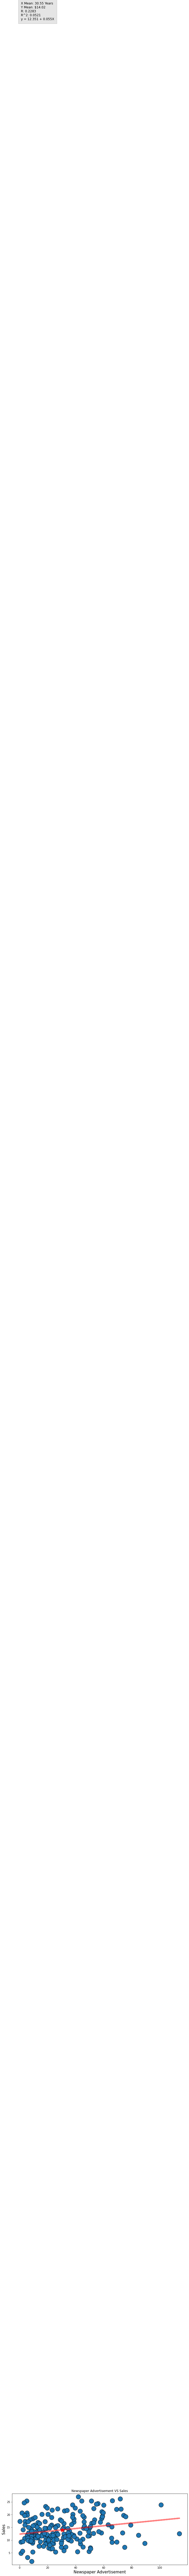

In [21]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=1000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('Newspaper Advertisement VS Sales')
plt.xlabel('Newspaper Advertisement', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point

In [22]:
def predict(B0, B1, new_x):
    y = B0 + B1 * new_x
    return y